In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

/home/hzlinarch/.local/lib/python3.10/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
### VARIABLES 
d = 3 # The dimensionality
convertUnits = True # Convert the Diffusion coefficient to m2/s 
#convFactor = 1e-11 # Multiply by this to get D in m2/s (when time is in ns and distance is in Angstrom)
convFactor = 1e-8 # Multiply by this to get D in m2/s (when time is in ps and distance is in Angstrom)
fileName = '../output/msd-xyz.txt' # from output of example. Should already be present  

In [3]:
def fit_MSD_linear_reg(data):
    ''' Returns the output of a linear regression 
    
    data: Pandas data frame 
    '''
    # Fit the model
    x = data['lag-time']
    y = data['MSD']

    data_anova = pd.DataFrame({'x': x, 'y': y})
    model = ols("y ~ x", data_anova) 
    results = model.fit()
    
    return results

<function matplotlib.pyplot.show(close=None, block=None)>

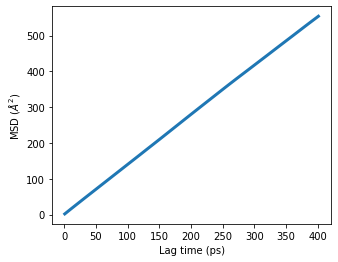

In [4]:
data = pd.read_table(fileName, header=None, usecols=[0,1], names=['lag-time', 'MSD'], sep=' ')  
plt.figure(figsize=(5, 4))

plt.plot(data['lag-time'], data['MSD'], linewidth=3)
plt.xlabel("Lag time (ps)")
plt.ylabel("MSD ($Å^2$)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

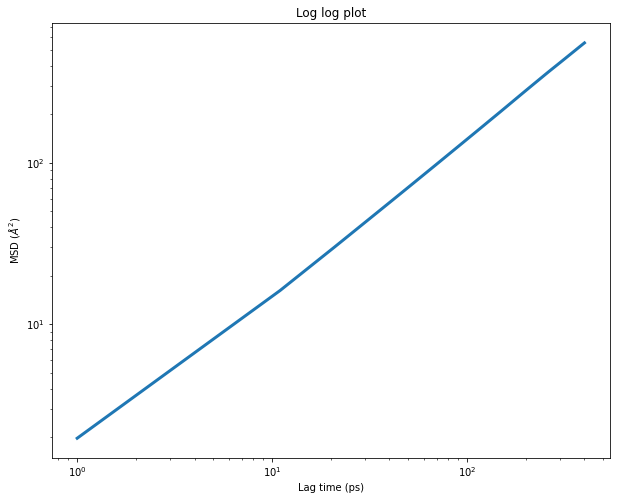

In [5]:
# Plot the log-log plot
plt.figure(figsize=(10, 8))

# plt.plot(data['lag time'], data['MSD'], 'o', markersize=3)
plt.loglog(data['lag-time'], data['MSD'], linewidth=3)
plt.xlabel("Lag time (ps)")
plt.ylabel("MSD ($Å^2$)")
plt.title("Log log plot")
plt.show

In [6]:
# Fit the model
x = data['lag-time']
y = data['MSD']

data_anova = pd.DataFrame({'x': x, 'y': y})
model = ols("y ~ x", data_anova) 
results = model.fit()
print(results.summary())

print("Parameters: ", results.params)
print("R2: ", results.rsquared)

# Perform analysis of variance on fitted linear model
anova_results = anova_lm(results, test='Chisq')

print('\nANOVA results')
print(anova_results)
print("\nChisq: ", anova_results.Chisq)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.783e+05
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           1.69e-86
Time:                        16:05:09   Log-Likelihood:                -61.740
No. Observations:                  41   AIC:                             127.5
Df Residuals:                      39   BIC:                             130.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9841      0.344      5.762      0.0

Diffusion coefficient in m2/s:  2.3057535938427965e-09


<function matplotlib.pyplot.show(close=None, block=None)>

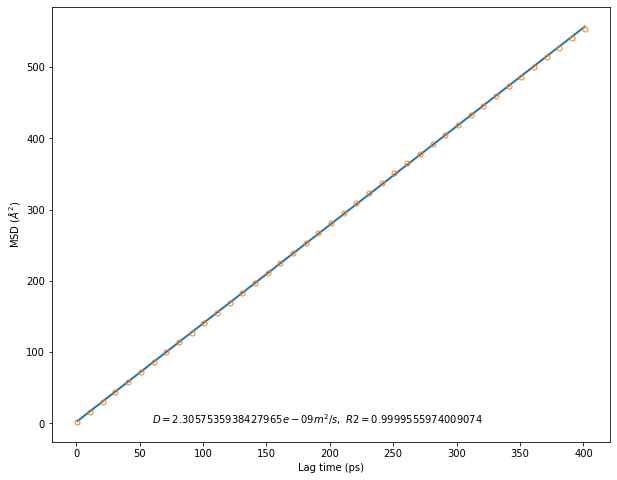

In [7]:
# Retrieve the parameter estimates
offset, coef = results.params

# The diffusion coefficient is given by 
# slope = 2*D*d where d is the dimensionality
# here, coef = slope
D = coef/(2*d) # in the given dimensions
# Here D is in Ang^2/ns
if convertUnits:
    D = convFactor*D

print("Diffusion coefficient in m2/s: ", D)

## Plotting!!
plt.figure(figsize=(10, 8))
plt.xlabel("Lag time (ps)")
plt.ylabel("MSD ($Å^2$)")

# The fitted line :)
plt.plot(x, x*coef + offset, linewidth=2)

#s = '$D='+str(D)+'m^2/s,\\ R2='+ str(results.rsquared)+ ',\\ ChiSq=' + str(anova_results.Chisq.Residual) +'$'
s = '$D='+str(D)+'m^2/s,\\ R2='+ str(results.rsquared)+'$'
plt.text(60, .025, s)

# Original data points
plt.plot(data['lag-time'], data['MSD'], 'o', fillstyle='none', markersize=5)

# Show the plot :) 
plt.show

In [8]:
# Ignore lag times less than 40 ns
data = data[4:]

# Redo D calculation
# Fit the model
x = data['lag-time']
y = data['MSD']

data_anova = pd.DataFrame({'x': x, 'y': y})
model = ols("y ~ x", data_anova) 
results = model.fit()
print(results.summary())

print("Parameters: ", results.params)
print("R2: ", results.rsquared)

# Perform analysis of variance on fitted linear model
anova_results = anova_lm(results, test='Chisq')

print('\nANOVA results')
print(anova_results)
print("\nChisq: ", anova_results.Chisq)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.591e+05
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           2.07e-76
Time:                        16:05:10   Log-Likelihood:                -55.173
No. Observations:                  37   AIC:                             114.3
Df Residuals:                      35   BIC:                             117.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5128      0.418      6.017      0.0

Diffusion coefficient in m2/s:  2.3025582066012597e-09
R2:  0.9999469027814408


<function matplotlib.pyplot.show(close=None, block=None)>

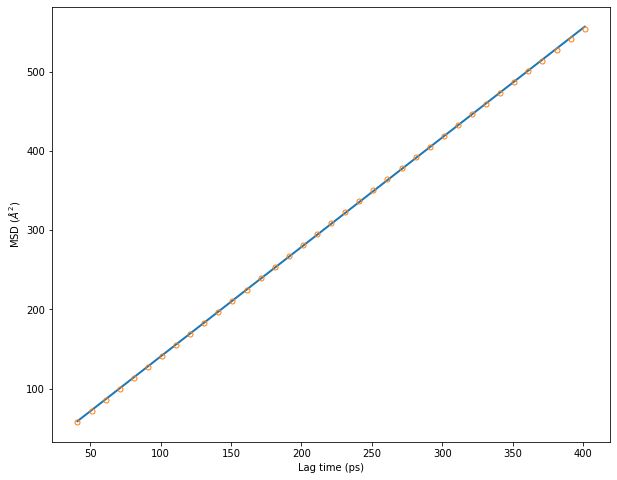

In [9]:
## Plot everything
offset, coef = results.params

# The diffusion coefficient is given by 
# slope = 2*D*d where d is the dimensionality
# here, coef = slope
D = coef/(2*d) # in the given dimensions
# Here D is in Ang^2/ns
if convertUnits:
    D = convFactor*D

print("Diffusion coefficient in m2/s: ", D)
print("R2: ", results.rsquared)

## Plotting!!
plt.figure(figsize=(10, 8))
plt.xlabel("Lag time (ps)")
plt.ylabel("MSD ($Å^2$)")
s = '$D='+str(D)+'m^2/s,\\ R2='+ str(results.rsquared)+'$'
# The fitted line :)
plt.plot(x, x*coef + offset, linewidth=2)

#s = '$D='+str(D)+'m^2/s,\\ R2='+ str(results.rsquared)+ ',\\ ChiSq=' + str(anova_results.Chisq.Residual) +'$'

# Original data points
plt.plot(data['lag-time'], data['MSD'], 'o', fillstyle='none', markersize=5)
#plt.text(60, .025, s)
# Show the plot :) 
plt.show

One possible way to estimate the uncertainty is to calculate Dxx, Dyy, Dzz
then average over all three to get D. Dxx, Dyy and Dzz should be equal in an isotropic system (with a cubic box)

In [10]:
## X dimension 
fileName = '../output/msd-x.txt'
d = 1
dataX = pd.read_table(fileName, header=None, usecols=[0,1], names=['lag-time', 'MSD'], sep=' ')  

results = fit_MSD_linear_reg(dataX)

# Retrieve the parameter estimates
offset, coef = results.params

# The diffusion coefficient is given by 
# slope = 2*D*d where d is the dimensionality
# here, coef = slope
Dxx = coef/(2*d) # in the given dimensions
# Here D is in Ang^2/ns
if convertUnits:
    Dxx = convFactor*Dxx

In [11]:
## Y dimension 
fileName = '../output/msd-y.txt'
d = 1
dataY = pd.read_table(fileName, header=None, usecols=[0,1], names=['lag-time', 'MSD'], sep=' ')  

results = fit_MSD_linear_reg(dataY)

# Retrieve the parameter estimates
offset, coef = results.params

# The diffusion coefficient is given by 
# slope = 2*D*d where d is the dimensionality
# here, coef = slope
Dyy = coef/(2*d) # in the given dimensions
# Here D is in Ang^2/ns
if convertUnits:
    Dyy = convFactor*Dyy
    
print("Dxx in m2/s: ", Dxx)
print("Dyy in m2/s: ", Dyy)

Dxx in m2/s:  2.284135061693552e-09
Dyy in m2/s:  2.3401527720017566e-09


In [12]:
## Z dimension 
fileName = '../output/msd-z.txt'
d = 1
dataZ = pd.read_table(fileName, header=None, usecols=[0,1], names=['lag-time', 'MSD'], sep=' ')  

results = fit_MSD_linear_reg(dataZ)

# Retrieve the parameter estimates
offset, coef = results.params

# The diffusion coefficient is given by 
# slope = 2*D*d where d is the dimensionality
# here, coef = slope
Dzz = coef/(2*d) # in the given dimensions
# Here D is in Ang^2/ns
if convertUnits:
    Dzz = convFactor*Dzz
    
allD = np.array([Dxx, Dyy, Dzz])

print("Dxx in m2/s: ", Dxx)
print("Dyy in m2/s: ", Dyy)
print("Dzz in m2/s: ", Dzz)
print("Average D in m2/s is: ", np.mean(allD), " , standard deviation of ", np.std(allD))

Dxx in m2/s:  2.284135061693552e-09
Dyy in m2/s:  2.3401527720017566e-09
Dzz in m2/s:  2.292972947833081e-09
Average D in m2/s is:  2.3057535938427965e-09  , standard deviation of  2.459003390756401e-11
